In [1]:
import tensorflow as tf
tf.__version__

'2.0.0-beta0'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
train_image.shape

(60000, 28, 28)

In [5]:
train_label.shape

(60000,)

In [6]:
test_image.shape, test_label.shape

((10000, 28, 28), (10000,))

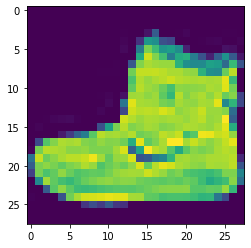

In [7]:
plt.imshow(train_image[0])

In [8]:
np.max(train_image[0])

255

In [9]:
train_label[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [10]:
train_image = train_image/255
test_image = test_image/255

In [37]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # 28 * 28向量
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [38]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [40]:
model.fit(train_image, train_label, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.5037 - acc: 0.8219
Epoch 2/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3776 - acc: 0.8636
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3370 - acc: 0.8771
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3131 - acc: 0.8844
Epoch 5/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2960 - acc: 0.8906


In [20]:
model.evaluate(test_image, test_label)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.3465 - acc: 0.8726


[0.34648416061401366, 0.8726]

In [21]:
train_label[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [11]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)

In [25]:
train_label_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [12]:
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [27]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # 28 * 28向量
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [28]:
model1.fit(train_image, train_label_onehot, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4995 - acc: 0.8237
Epoch 2/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3765 - acc: 0.8641
Epoch 3/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3377 - acc: 0.8776
Epoch 4/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3142 - acc: 0.8843
Epoch 5/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2970 - acc: 0.8903


In [29]:
predict = model1.predict(test_image)

In [30]:
predict.shape

(10000, 10)

In [31]:
predict[0]

array([6.7509995e-06, 1.0274391e-05, 5.4797613e-07, 6.8453616e-08,
       1.2973260e-06, 3.5362527e-02, 2.0003048e-05, 9.2891753e-02,
       5.6954072e-04, 8.7113732e-01], dtype=float32)

In [32]:
np.argmax(predict[0])

9

In [40]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # 28 * 28向量
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

In [42]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [43]:
history = model.fit(train_image, train_label_onehot, epochs=10, 
          validation_data=(test_image, test_label_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.8747 - acc: 0.6776 - val_loss: 0.5426 - val_acc: 0.7932
Epoch 2/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.6228 - acc: 0.7785 - val_loss: 0.4857 - val_acc: 0.8332
Epoch 3/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5737 - acc: 0.7979 - val_loss: 0.4782 - val_acc: 0.8347
Epoch 4/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.5545 - acc: 0.8058 - val_loss: 0.4572 - val_acc: 0.8340
Epoch 5/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.5370 - acc: 0.8102 - val_loss: 0.4431 - val_acc: 0.8473
Epoch 6/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.5221 - acc: 0.8147 - val_loss: 0.4167 - val_acc: 0.8487
Epoch 7/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5133 - acc: 0.8193 - val_loss: 0

In [44]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

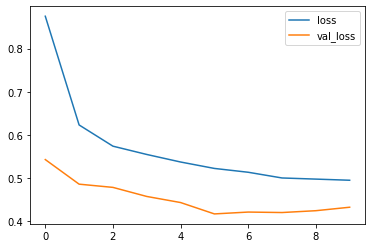

In [45]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

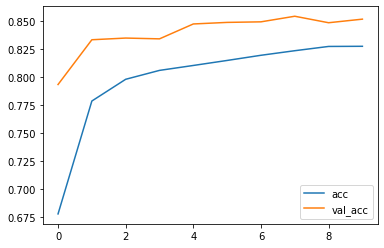

In [46]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

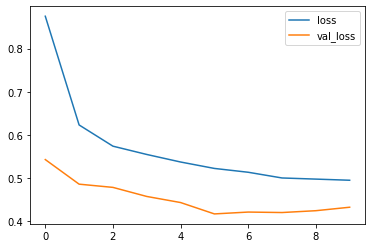

In [47]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

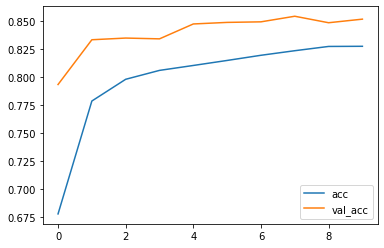

In [48]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

In [36]:
tf.keras.backend.clear_session()